In [1]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)

# use this environment flag to change which GPU to use
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# set the modified tf session as backend in keras
keras.backend.tensorflow_backend.set_session(get_session())

Using TensorFlow backend.


In [3]:
# adjust this to point to your downloaded/trained model
# models can be downloaded here: https://github.com/fizyr/keras-retinanet/releases
model_path = '../models/resnet50_csv_07_inf.h5'

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')

# if the model is not converted to an inference model, use the line below
# see: https://github.com/fizyr/keras-retinanet#converting-a-training-model-to-inference-model
#model = models.convert_model(model)

#print(model.summary())

# load label to names mapping for visualization purposes
labels_to_names = {0: 'pastille'}

Instructions for updating:
Colocations handled automatically by placer.


/home/abert/.virtualenvs/test/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


scale1 =  12.16
(300, 450)


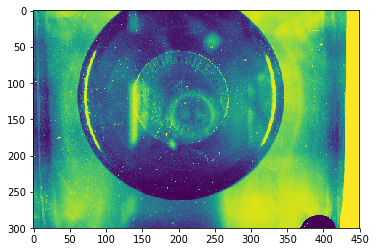

processing time1:  0.31887197494506836
processing time2:  0.46814751625061035
[[[361.52505 146.54865 724.89124 503.2326 ]
  [306.22742 202.56378 807.7458  605.74414]
  [457.59378 235.71284 708.5798  475.80066]
  ...
  [ -1.       -1.       -1.       -1.     ]
  [ -1.       -1.       -1.       -1.     ]
  [ -1.       -1.       -1.       -1.     ]]]
scale2 =  2.6666666666666665
[[[1648.5542   668.26184 3305.504   2294.7407 ]
  [1396.397    923.69086 3683.3208  2762.1934 ]
  [2086.6277  1074.8506  3231.1238  2169.651  ]
  ...
  [  -4.56      -4.56      -4.56      -4.56   ]
  [  -4.56      -4.56      -4.56      -4.56   ]
  [  -4.56      -4.56      -4.56      -4.56   ]]]
0.98271257
0.11703962


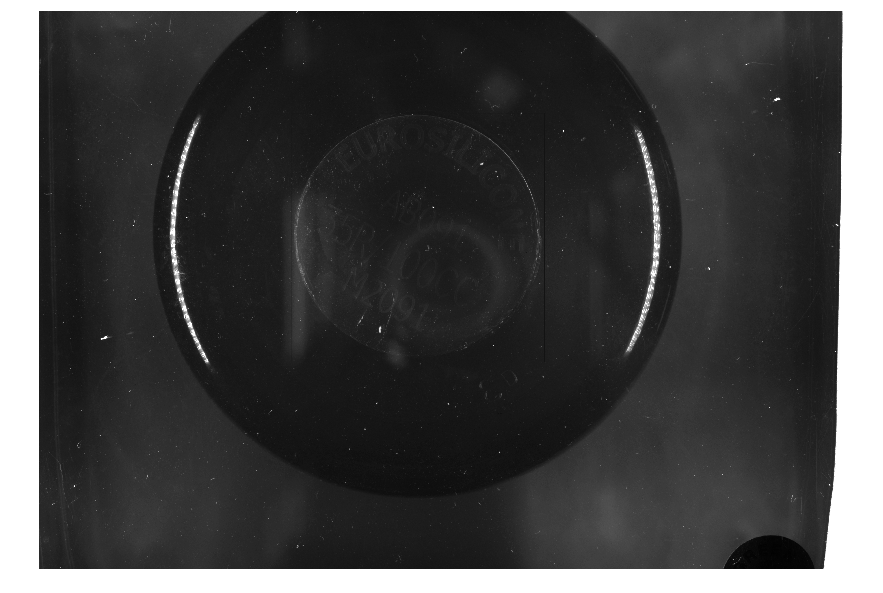

In [41]:
# load image
start = time.time()
image = cv2.imread('../dataset/img_test/FULL-2019-04-26-160938.png',0)

size = image.shape

WIDTH = 450
HEIGHT = 300
image2 = cv2.resize(image,(WIDTH,HEIGHT))
scale1 = size[0]/300
print('scale1 = ', scale1)

print(image2.shape)
image2 = cv2.equalizeHist(image2)
plt.imshow(image2)
plt.show()
image2 = cv2.cvtColor(image2,cv2.COLOR_GRAY2RGB)

# copy to draw on
draw = image.copy()

# preprocess image for network

image2 = preprocess_image(image2)
image2, scale2 = resize_image(image2)

print("processing time1: ", time.time() - start)
# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image2, axis=0))
print("processing time2: ", time.time() - start)
print(boxes)

# correct for image scale
print('scale2 = ', scale2)
boxes *=scale1/scale2
print(boxes)
# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    print(score)
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    #caption = "{} {:.3f}".format(labels_to_names[label], score)
    #draw_caption(draw, b, caption)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw, cmap='gray')
plt.show()